# MLiP - Bengali.AI - Group Sanne de Kleijn

## Libraries

As a first step we need to import some libraries

In [8]:
# We use tensorflow's version of Keras
import os
import pandas as pd
import numpy as np
import PIL.Image
import time
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
%matplotlib inline 

## Loading the dataset
For this notebook we use the Bengali.AI handwritten Grapheme data set from Kaggle \[1\].

In [36]:
# Check the data
for dirname, _, filenames in os.walk('Data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Load the train data
DATA_FOLDER = 'Data/'
train_df_ = pd.read_csv(os.path.join(DATA_FOLDER, 'train.csv'))
train_df_.head()

print('train_df shape: ', train_df_.shape)

# Load the test data
test_df_ = pd.read_csv(os.path.join(DATA_FOLDER, 'test.csv'))
test_df_.head()

print('test_df shape: ', test_df_.shape)

# Load class map
class_map_df_ = pd.read_csv(os.path.join(DATA_FOLDER, 'class_map.csv'))
class_map_df_.head()

print('class_map_df shape: ', class_map_df_.shape)

# Load sample submissions
sample_submission_df_ = pd.read_csv(os.path.join(DATA_FOLDER, 'sample_submission.csv'))
sample_submission_df_.head()

print('sample_submission_df shape: ', sample_submission_df_.shape)



Data\class_map.csv
Data\sample_submission.csv
Data\sample_train_image_data_0.parquet
Data\test.csv
Data\test_image_data_0.parquet
Data\test_image_data_1.parquet
Data\test_image_data_2.parquet
Data\test_image_data_3.parquet
Data\train.csv
Data\train_image_data_0.parquet
Data\train_image_data_1.parquet
Data\train_image_data_2.parquet
Data\train_image_data_3.parquet
train_df shape:  (200840, 5)
test_df shape:  (36, 3)
class_map_df shape:  (186, 3)
sample_submission_df shape:  (36, 2)


## Read parquet files

### Read train files

We start with only two files \[1\].

In [10]:
# Read first file
start_time = time.time()
train_0_df = pd.read_parquet(os.path.join(DATA_FOLDER,'train_image_data_0.parquet'))
print(f"`train_image_data_0` read in {round(time.time()-start_time,2)} sec.") 

print('train_0_df shape: ', train_0_df.shape)

print(train_0_df.head())


C:\Users\Mick\Anaconda3\envs\ismi\lib\site-packages\fastparquet\dataframe.py:5: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import CategoricalIndex, RangeIndex, Index, MultiIndex


`train_image_data_0` read in 120.25 sec.
train_0_df shape:  (50210, 32333)
  image_id    0    1    2    3    4    5    6    7    8  ...  32322  32323  \
0  Train_0  254  253  252  253  251  252  253  251  251  ...    253    253   
1  Train_1  251  244  238  245  248  246  246  247  251  ...    255    255   
2  Train_2  251  250  249  250  249  245  247  252  252  ...    254    253   
3  Train_3  247  247  249  253  253  252  251  251  250  ...    254    254   
4  Train_4  249  248  246  246  248  244  242  242  229  ...    255    255   

   32324  32325  32326  32327  32328  32329  32330  32331  
0    253    253    253    253    253    253    253    251  
1    255    255    255    255    255    255    255    254  
2    252    252    253    253    253    253    251    249  
3    254    254    254    253    253    252    251    252  
4    255    255    255    255    255    255    255    255  

[5 rows x 32333 columns]


In [ ]:
# Read second file
#start_time = time.time()
#train_1_df = pd.read_parquet(os.path.join(DATA_FOLDER,'train_image_data_1.parquet'))
#print(f"`train_image_data_1` read in {round(time.time()-start_time,2)} sec.")  

#print('train_0_df shape: ', train_0_df.shape)

#print(train_0_df.head())

In [16]:
# Read sample file 
sample_train_0_df = pd.read_parquet(os.path.join(DATA_FOLDER,'sample_train_image_data_0.parquet'))
print(f"`sample_train_image_data_0` read in {round(time.time()-start_time,2)} sec.") 

print('train_0_df shape: ', sample_train_0_df.shape)

print(sample_train_0_df.head())

`sample_train_image_data_0` read in 108.91 sec.
train_0_df shape:  (5021, 32333)
          image_id    0    1    2    3    4    5    6    7    8  ...  32322  \
index                                                            ...          
2354    Train_2354  254  254  254  253  254  254  254  255  255  ...    255   
46605  Train_46605  248  248  252  253  252  250  251  251  252  ...    252   
41255  Train_41255  252  253  255  255  255  255  255  255  255  ...    251   
25654  Train_25654  255  255  255  255  255  255  255  255  255  ...    251   
10863  Train_10863  244  247  251  249  244  247  252  249  245  ...    254   

       32323  32324  32325  32326  32327  32328  32329  32330  32331  
index                                                                 
2354     255    255    255    255    253    252    253    251    249  
46605    254    254    254    253    254    253    253    253    252  
41255    251    251    251    251    251    251    251    251    251  
25654    2

### Read test files

We start with only one test file \[1\].

In [11]:
# Read first test file
start_time = time.time()
test_0_df = pd.read_parquet(os.path.join(DATA_FOLDER,'test_image_data_0.parquet'))
print(f"`test_image_data_0` read in {round(time.time()-start_time,2)} sec.")  

print('test_0_df shape: ', test_0_df.shape)

print(test_0_df.head())

`test_image_data_0` read in 28.57 sec.
train_0_df shape:  (50210, 32333)
  image_id    0    1    2    3    4    5    6    7    8  ...  32322  32323  \
0  Train_0  254  253  252  253  251  252  253  251  251  ...    253    253   
1  Train_1  251  244  238  245  248  246  246  247  251  ...    255    255   
2  Train_2  251  250  249  250  249  245  247  252  252  ...    254    253   
3  Train_3  247  247  249  253  253  252  251  251  250  ...    254    254   
4  Train_4  249  248  246  246  248  244  242  242  229  ...    255    255   

   32324  32325  32326  32327  32328  32329  32330  32331  
0    253    253    253    253    253    253    253    251  
1    255    255    255    255    255    255    255    254  
2    252    252    253    253    253    253    251    249  
3    254    254    254    253    253    252    251    252  
4    255    255    255    255    255    255    255    255  

[5 rows x 32333 columns]


### Data check

We check whether the distribution of the classes matches the kaggle dataset \[1\].

In [12]:
print(f"Train: unique grapheme roots: {train_df_.grapheme_root.nunique()}")
print(f"Train: unique vowel diacritics: {train_df_.vowel_diacritic.nunique()}")
print(f"Train: unique consonant diacritics: {train_df_.consonant_diacritic.nunique()}")
print(f"Train: total unique elements: {train_df_.grapheme_root.nunique() + train_df.vowel_diacritic.nunique() + train_df.consonant_diacritic.nunique()}")
print(f"Class map: unique elements: \n{class_map_df_.component_type.value_counts()}")
print(f"Total combinations: {pd.DataFrame(train_df_.groupby(['grapheme_root', 'vowel_diacritic', 'consonant_diacritic'])).shape[0]}")
      

# TODO: asserts? 

Train: unique grapheme roots: 168
Train: unique vowel diacritics: 11
Train: unique consonant diacritics: 7
Train: total unique elements: 186
Class map: unique elements: 
grapheme_root          168
vowel_diacritic         11
consonant_diacritic      7
Name: component_type, dtype: int64
Total combinations: 1292


## Inspect grapheme images

We define a function to show a sample of size * size (ex: 5 x 5 = 25) handwritten graphemes \[1\].

In [13]:
def display_image_from_data(data_df, size=5):
    '''
    Display grapheme images from sample data
    param: data_df - sample of data
    param: size - sqrt(sample size of data)
    '''
    plt.figure()
    fig, ax = plt.subplots(size,size,figsize=(12,12))
    # we show grapheme images for a selection of size x size samples
    for i, index in enumerate(data_df.index):
        image_id = data_df.iloc[i]['image_id']
        flattened_image = data_df.iloc[i].drop('image_id').values.astype(np.uint8)
        unpacked_image = PIL.Image.fromarray(flattened_image.reshape(137, 236))

        ax[i//size, i%size].imshow(unpacked_image)
        ax[i//size, i%size].set_title(image_id)
        ax[i//size, i%size].axis('on')

<Figure size 432x288 with 0 Axes>

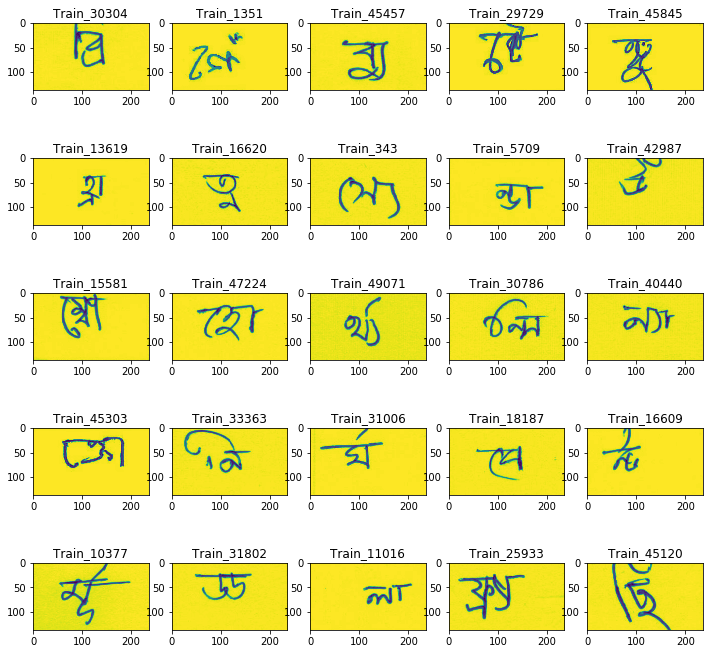

In [14]:
display_image_from_data(train_0_df.sample(25))

We define another function to show the same grapheme in different writing, i.e. to perform sampling (based on variation of grapheme root, vowel diacritic and consonant diacritic, as parameters to the function) \[1\].

In [15]:
def display_writting_variety(data_df=train_0_df, grapheme_root=72, vowel_diacritic=0,\
                             consonant_diacritic=0, size=5):
    '''
    This function get a set of grapheme root, vowel diacritic and consonant diacritic
    and display a sample of 25 images for this grapheme
    param: data_df - the dataset used as source of data
    param: grapheme_root - the grapheme root label
    param: vowel_diacritic - the vowel diacritic label
    param: consonant_diacritic - the consonant diacritic label 
    param: size - sqrt(number of images to show)
    '''
    sample_train_df = train_df.loc[(train_df.grapheme_root == grapheme_root) & \
                                  (train_df.vowel_diacritic == vowel_diacritic) & \
                                  (train_df.consonant_diacritic == consonant_diacritic)]
    print(f"total: {sample_train_df.shape}")
    sample_df = data_df.merge(sample_train_df.image_id, how='inner')
    print(f"total: {sample_df.shape}")
    gr = sample_train_df.iloc[0]['grapheme']
    cm_gr = class_map_df.loc[(class_map_df.component_type=='grapheme_root')& \
                             (class_map_df.label==grapheme_root), 'component'].values[0]
    cm_vd = class_map_df.loc[(class_map_df.component_type=='vowel_diacritic')& \
                             (class_map_df.label==vowel_diacritic), 'component'].values[0]    
    cm_cd = class_map_df.loc[(class_map_df.component_type=='consonant_diacritic')& \
                             (class_map_df.label==consonant_diacritic), 'component'].values[0]    
    
    print(f"grapheme: {gr}, grapheme root: {cm_gr}, vowel discritic: {cm_vd}, consonant diacritic: {cm_cd}")
    sample_df = sample_df.sample(size * size)
    display_image_from_data(sample_df, size=size)


total: (163, 5)
total: (36, 32333)
grapheme: দাঁ, grapheme root: দ, vowel discritic: া, consonant diacritic: ঁ


<Figure size 432x288 with 0 Axes>

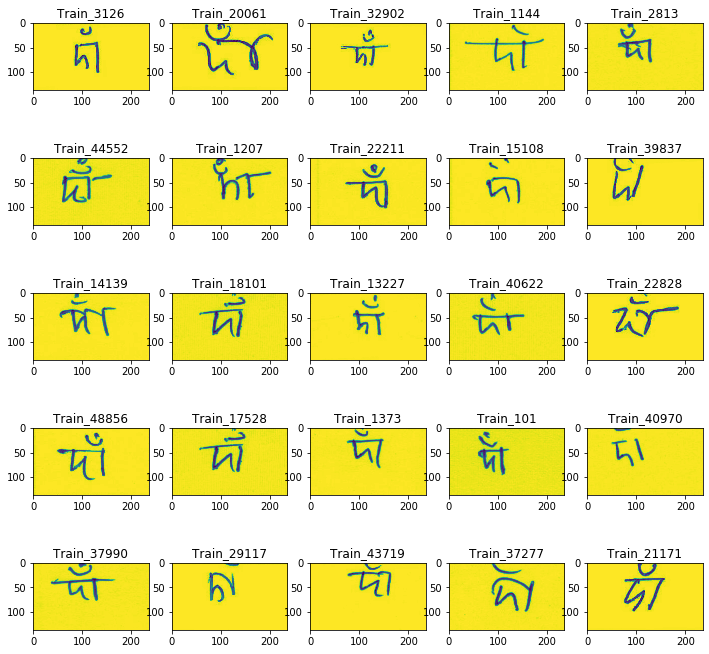

In [16]:
display_writting_variety(train_0_df,72,1,1,5)

## References

\[1\] https://www.kaggle.com/gpreda/bengali-ai-handwritten-grapheme-getting-started Retrieved on: February 18, 2020

# Base Model

In [37]:
# HEIGHT = 236
# WIDTH = 236

In [ ]:
train_df_ = train_df_.drop(['grapheme'], axis=1, inplace=False)
train_df_[['grapheme_root', 'vowel_diacritic', 'consonant_diacritic']] = train_df_[['grapheme_root', 'vowel_diacritic', 'consonant_diacritic']].astype('uint8')

In [47]:
IMG_SIZE=64
N_CHANNELS=1

In [48]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tqdm.auto import tqdm
from glob import glob
import time, gc
import cv2

from tensorflow import keras
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.models import clone_model
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout,BatchNormalization, Input
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import PIL.Image as Image, PIL.ImageDraw as ImageDraw, PIL.ImageFont as ImageFont
from matplotlib import pyplot as plt
import seaborn as sns

In [49]:
def resize(df, size=64, need_progress_bar=True):
    resized = {}
    resize_size=64
    if need_progress_bar:
        for i in tqdm(range(df.shape[0])):
            image=df.loc[df.index[i]].values.reshape(137,236)
            _, thresh = cv2.threshold(image, 30, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
            contours, _ = cv2.findContours(thresh,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)[-2:]

            idx = 0 
            ls_xmin = []
            ls_ymin = []
            ls_xmax = []
            ls_ymax = []
            for cnt in contours:
                idx += 1
                x,y,w,h = cv2.boundingRect(cnt)
                ls_xmin.append(x)
                ls_ymin.append(y)
                ls_xmax.append(x + w)
                ls_ymax.append(y + h)
            xmin = min(ls_xmin)
            ymin = min(ls_ymin)
            xmax = max(ls_xmax)
            ymax = max(ls_ymax)

            roi = image[ymin:ymax,xmin:xmax]
            resized_roi = cv2.resize(roi, (resize_size, resize_size),interpolation=cv2.INTER_AREA)
            resized[df.index[i]] = resized_roi.reshape(-1)
    else:
        for i in range(df.shape[0]):
            #image = cv2.resize(df.loc[df.index[i]].values.reshape(137,236),(size,size),None,fx=0.5,fy=0.5,interpolation=cv2.INTER_AREA)
            image=df.loc[df.index[i]].values.reshape(137,236)
            _, thresh = cv2.threshold(image, 30, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
            contours, _ = cv2.findContours(thresh,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)[-2:]

            idx = 0 
            ls_xmin = []
            ls_ymin = []
            ls_xmax = []
            ls_ymax = []
            for cnt in contours:
                idx += 1
                x,y,w,h = cv2.boundingRect(cnt)
                ls_xmin.append(x)
                ls_ymin.append(y)
                ls_xmax.append(x + w)
                ls_ymax.append(y + h)
            xmin = min(ls_xmin)
            ymin = min(ls_ymin)
            xmax = max(ls_xmax)
            ymax = max(ls_ymax)

            roi = image[ymin:ymax,xmin:xmax]
            resized_roi = cv2.resize(roi, (resize_size, resize_size),interpolation=cv2.INTER_AREA)
            resized[df.index[i]] = resized_roi.reshape(-1)
    resized = pd.DataFrame(resized).T
    return resized

In [50]:
def get_dummies(df):
    cols = []
    for col in df:
        cols.append(pd.get_dummies(df[col].astype(str)))
    return pd.concat(cols, axis=1)

In [63]:
inputs = Input(shape = (IMG_SIZE, IMG_SIZE, 1))

model = Conv2D(filters=32, kernel_size=(3, 3), padding='SAME', activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1))(inputs)
model = Conv2D(filters=32, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
model = Conv2D(filters=32, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
model = Conv2D(filters=32, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = MaxPool2D(pool_size=(2, 2))(model)
model = Conv2D(filters=32, kernel_size=(5, 5), padding='SAME', activation='relu')(model)
model = Dropout(rate=0.3)(model)

model = Conv2D(filters=64, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
model = Conv2D(filters=64, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
model = Conv2D(filters=64, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
model = Conv2D(filters=64, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = MaxPool2D(pool_size=(2, 2))(model)
model = Conv2D(filters=64, kernel_size=(5, 5), padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = Dropout(rate=0.3)(model)

model = Conv2D(filters=128, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
model = Conv2D(filters=128, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
model = Conv2D(filters=128, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
model = Conv2D(filters=128, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = MaxPool2D(pool_size=(2, 2))(model)
model = Conv2D(filters=128, kernel_size=(5, 5), padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = Dropout(rate=0.3)(model)

model = Conv2D(filters=256, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
model = Conv2D(filters=256, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
model = Conv2D(filters=256, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
model = Conv2D(filters=256, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = MaxPool2D(pool_size=(2, 2))(model)
model = Conv2D(filters=256, kernel_size=(5, 5), padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = Dropout(rate=0.3)(model)

model = Flatten()(model)
model = Dense(1024, activation = "relu")(model)
model = Dropout(rate=0.3)(model)
dense = Dense(512, activation = "relu")(model)

head_root = Dense(168, activation = 'softmax')(dense)
head_vowel = Dense(11, activation = 'softmax')(dense)
head_consonant = Dense(7, activation = 'softmax')(dense)

model = Model(inputs=inputs, outputs=[head_root, head_vowel, head_consonant])

In [64]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
conv2d_81 (Conv2D)              (None, 64, 64, 32)   320         input_5[0][0]                    
__________________________________________________________________________________________________
conv2d_82 (Conv2D)              (None, 64, 64, 32)   9248        conv2d_81[0][0]                  
__________________________________________________________________________________________________
conv2d_83 (Conv2D)              (None, 64, 64, 32)   9248        conv2d_82[0][0]                  
__________________________________________________________________________________________________
conv2d_84 

In [53]:
# from keras.utils import plot_model
# plot_model(model, to_file='model.png')

In [66]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [67]:
# Set a learning rate annealer. Learning rate will be half after 3 epochs if accuracy is not increased
learning_rate_reduction_root = ReduceLROnPlateau(monitor='dense_3_accuracy', 
                                            patience=3, 
                                            verbose=1,
                                            factor=0.5, 
                                            min_lr=0.00001)
learning_rate_reduction_vowel = ReduceLROnPlateau(monitor='dense_4_accuracy', 
                                            patience=3, 
                                            verbose=1,
                                            factor=0.5, 
                                            min_lr=0.00001)
learning_rate_reduction_consonant = ReduceLROnPlateau(monitor='dense_5_accuracy', 
                                            patience=3, 
                                            verbose=1,
                                            factor=0.5, 
                                            min_lr=0.00001)

In [68]:
batch_size = 256
epochs = 1

In [69]:
class MultiOutputDataGenerator(keras.preprocessing.image.ImageDataGenerator):

    def flow(self,
             x,
             y=None,
             batch_size=32,
             shuffle=True,
             sample_weight=None,
             seed=None,
             save_to_dir=None,
             save_prefix='',
             save_format='png',
             subset=None):

        targets = None
        target_lengths = {}
        ordered_outputs = []
        for output, target in y.items():
            if targets is None:
                targets = target
            else:
                targets = np.concatenate((targets, target), axis=1)
            target_lengths[output] = target.shape[1]
            ordered_outputs.append(output)


        for flowx, flowy in super().flow(x, targets, batch_size=batch_size,
                                         shuffle=shuffle):
            target_dict = {}
            i = 0
            for output in ordered_outputs:
                target_length = target_lengths[output]
                target_dict[output] = flowy[:, i: i + target_length]
                i += target_length

            yield flowx, target_dict

In [70]:
HEIGHT = 137
WIDTH = 236
N_OF_PARQUETS = 1

In [72]:
histories = []
# for i in range(N_OF_PARQUETS):
train_df = pd.merge(train_0_df, train_df_, on='image_id').drop(['image_id'], axis=1)

# Visualize few samples of current training dataset
# fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(16, 8))
# count=0
# for row in ax:
#     for col in row:
#         col.imshow(resize(train_df.drop(['grapheme_root', 'vowel_diacritic', 'consonant_diacritic'], axis=1).iloc[[count]], need_progress_bar=False).values.reshape(-1).reshape(IMG_SIZE, IMG_SIZE).astype(np.float64))
#         count += 1
# plt.show()

print('Before X_train')
X_train = train_df.drop(['grapheme_root', 'vowel_diacritic', 'consonant_diacritic'], axis=1)
X_train = resize(X_train)/255

print('Before reshape')
# CNN takes images in shape `(batch_size, h, w, channels)`, so reshape the images
X_train = X_train.values.reshape(-1, IMG_SIZE, IMG_SIZE, N_CHANNELS)

print('Before get dummies')
Y_train_root = pd.get_dummies(train_df['grapheme_root']).values
Y_train_vowel = pd.get_dummies(train_df['vowel_diacritic']).values
Y_train_consonant = pd.get_dummies(train_df['consonant_diacritic']).values

print(f'Training images: {X_train.shape}')
print(f'Training labels root: {Y_train_root.shape}')
print(f'Training labels vowel: {Y_train_vowel.shape}')
print(f'Training labels consonants: {Y_train_consonant.shape}')

# Divide the data into training and validation set
x_train, x_test, y_train_root, y_test_root, y_train_vowel, y_test_vowel, y_train_consonant, y_test_consonant = train_test_split(X_train, Y_train_root, Y_train_vowel, Y_train_consonant, test_size=0.08, random_state=666)
del train_df
del X_train
del Y_train_root, Y_train_vowel, Y_train_consonant

Before X_train



Before reshape
Before get dummies
Training images: (50210, 64, 64, 1)
Training labels root: (50210, 168)
Training labels vowel: (50210, 11)
Training labels consonants: (50210, 7)


In [73]:
# Data augmentation for creating more training data
datagen = MultiOutputDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=8,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range = 0.15, # Randomly zoom image 
    width_shift_range=0.15,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.15,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images


# This will just calculate parameters required to augment the given data. This won't perform any augmentations
datagen.fit(x_train)

# Fit the model
# Change dense numbers according to last 3 current numbers of dense layer of model which can be found in cell above 
history = model.fit_generator(datagen.flow(x_train, {'dense_23': y_train_root, 'dense_24': y_train_vowel, 'dense_25': y_train_consonant}, batch_size=batch_size),
                          epochs = epochs, validation_data = (x_test, [y_test_root, y_test_vowel, y_test_consonant]), 
                          steps_per_epoch=x_train.shape[0] // batch_size, 
                          callbacks=[learning_rate_reduction_root, learning_rate_reduction_vowel, learning_rate_reduction_consonant])

histories.append(history)

# Delete to reduce memory usage
del x_train
del x_test
del y_train_root
del y_test_root
del y_train_vowel
del y_test_vowel
del y_train_consonant
del y_test_consonant
gc.collect()

Epoch 1/1
  2/180 [..............................] - ETA: 1:01:23 - loss: 14.2795 - dense_23_loss: 6.2010 - dense_24_loss: 3.9499 - dense_25_loss: 4.1285 - dense_23_acc: 0.0039 - dense_24_acc: 0.1289 - dense_25_acc: 0.3574    

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Mick\Anaconda3\envs\ismi\lib\site-packages\IPython\core\interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-73-28b36b3aa7e0>", line 24, in <module>
    callbacks=[learning_rate_reduction_root, learning_rate_reduction_vowel, learning_rate_reduction_consonant])
  File "C:\Users\Mick\Anaconda3\envs\ismi\lib\site-packages\keras\legacy\interfaces.py", line 91, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\Mick\Anaconda3\envs\ismi\lib\site-packages\keras\engine\training.py", line 1418, in fit_generator
    initial_epoch=initial_epoch)
  File "C:\Users\Mick\Anaconda3\envs\ismi\lib\site-packages\keras\engine\training_generator.py", line 217, in fit_generator
    class_weight=class_weight)
  File "C:\Users\Mick\Anaconda3\envs\ismi\lib\site-packages\keras\engine\training.py", line 1217, in train_on_batch
    outputs = self.train_function(ins)
  File "C:\Users\M

KeyboardInterrupt: 

In [ ]:
%matplotlib inline
def plot_loss(his, epoch, title):
    plt.style.use('ggplot')
    plt.figure()
    plt.plot(np.arange(0, epoch), his.history['loss'], label='train_loss')
    plt.plot(np.arange(0, epoch), his.history['dense_3_loss'], label='train_root_loss')
    plt.plot(np.arange(0, epoch), his.history['dense_4_loss'], label='train_vowel_loss')
    plt.plot(np.arange(0, epoch), his.history['dense_5_loss'], label='train_consonant_loss')
    
    plt.plot(np.arange(0, epoch), his.history['val_dense_3_loss'], label='val_train_root_loss')
    plt.plot(np.arange(0, epoch), his.history['val_dense_4_loss'], label='val_train_vowel_loss')
    plt.plot(np.arange(0, epoch), his.history['val_dense_5_loss'], label='val_train_consonant_loss')
    
    plt.title(title)
    plt.xlabel('Epoch #')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.show()

def plot_acc(his, epoch, title):
    plt.style.use('ggplot')
    plt.figure()
    plt.plot(np.arange(0, epoch), his.history['dense_3_accuracy'], label='train_root_acc')
    plt.plot(np.arange(0, epoch), his.history['dense_4_accuracy'], label='train_vowel_accuracy')
    plt.plot(np.arange(0, epoch), his.history['dense_5_accuracy'], label='train_consonant_accuracy')
    
    plt.plot(np.arange(0, epoch), his.history['val_dense_3_accuracy'], label='val_root_acc')
    plt.plot(np.arange(0, epoch), his.history['val_dense_4_accuracy'], label='val_vowel_accuracy')
    plt.plot(np.arange(0, epoch), his.history['val_dense_5_accuracy'], label='val_consonant_accuracy')
    plt.title(title)
    plt.xlabel('Epoch #')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper right')
    plt.show()

In [ ]:
for dataset in range(N_OF_PARQUETS):
    plot_loss(histories[dataset], epochs, f'Training Dataset: {dataset}')
    plot_acc(histories[dataset], epochs, f'Training Dataset: {dataset}')

In [ ]:
del histories
gc.collect()

In [ ]:
preds_dict = {
    'grapheme_root': [],
    'vowel_diacritic': [],
    'consonant_diacritic': []
}

In [ ]:
components = ['consonant_diacritic', 'grapheme_root', 'vowel_diacritic']
target=[] # model predictions placeholder
row_id=[] # row_id place holder
for i in range(4):
    df_test_img = pd.read_parquet('/kaggle/input/bengaliai-cv19/test_image_data_{}.parquet'.format(i)) 
    df_test_img.set_index('image_id', inplace=True)

    X_test = resize(df_test_img, need_progress_bar=False)/255
    X_test = X_test.values.reshape(-1, IMG_SIZE, IMG_SIZE, N_CHANNELS)
    
    preds = model.predict(X_test)

    for i, p in enumerate(preds_dict):
        preds_dict[p] = np.argmax(preds[i], axis=1)

    for k,id in enumerate(df_test_img.index.values):  
        for i,comp in enumerate(components):
            id_sample=id+'_'+comp
            row_id.append(id_sample)
            target.append(preds_dict[comp][k])
    del df_test_img
    del X_test
    gc.collect()

df_sample = pd.DataFrame(
    {
        'row_id': row_id,
        'target':target
    },
    columns = ['row_id','target'] 
)
df_sample.to_csv('submission.csv',index=False)
df_sample.head()